In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


np.random.seed(42)

# Sample data: 100 students with random Grades, Attendance, and Study Hours
data = pd.DataFrame({
    'Grades': np.random.uniform(50, 100, 100),  # Grades between 50 to 100
    'Attendance': np.random.uniform(60, 100, 100),  # Attendance percentage between 60 and 100
    'Study_Hours': np.random.uniform(1, 10, 100)  # Study hours per week between 1 and 10
})

print(data.head())


      Grades  Attendance  Study_Hours
0  68.727006   61.257167     6.778285
1  97.535715   85.456416     1.757260
2  86.599697   72.574239     2.454658
3  79.932924   80.342828     9.086988
4  57.800932   96.302659     6.457862


In [11]:
KMeans()

KMeans()

In [6]:
# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(data)


In [ ]:
# Determine the optimal number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [8]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_features)
data['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


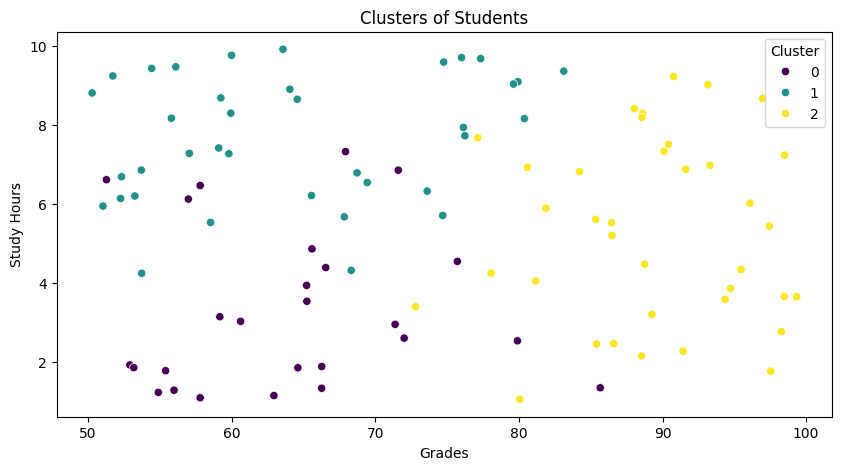

In [9]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Grades', y='Study_Hours', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters of Students')
plt.xlabel('Grades')
plt.ylabel('Study Hours')
plt.show()


In [10]:
# Display the average values for each cluster
print(data.groupby('Cluster').mean())


            Grades  Attendance  Study_Hours
Cluster                                    
0        63.953570   88.881354     3.284830
1        64.381273   74.337713     7.689223
2        89.351453   79.186927     5.295523
